In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("./day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [60]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [61]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [62]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<Axes: >

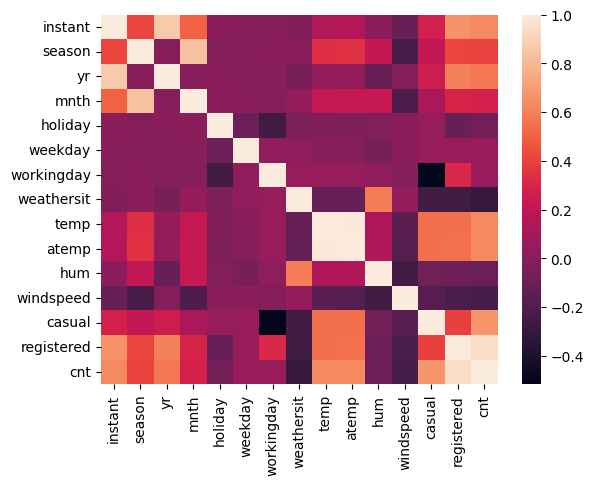

In [63]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix)

In [64]:
target_col = "cnt"
corr_thresh_upper = 0.5
corr_thresh_lower = -0.25

columns = corr_matrix[target_col][(corr_matrix[target_col] > corr_thresh_upper) | (corr_matrix[target_col] < corr_thresh_lower)].index.tolist()

In [65]:
columns.pop(-1)

'cnt'

In [66]:
columns

['instant', 'yr', 'weathersit', 'temp', 'atemp', 'casual', 'registered']

In [67]:
y = df[target_col]
x = df[columns]

In [68]:
x

,instant,yr,weathersit,temp,atemp,casual,registered
0,1,0,2,14.110847,18.18125,331,654
1,2,0,2,14.902598,17.68695,131,670
2,3,0,1,8.050924,9.47025,120,1229
3,4,0,1,8.200000,10.60610,108,1454
4,5,0,1,9.305237,11.46350,82,1518
...,...,...,...,...,...,...,...
725,726,1,2,10.420847,11.33210,247,1867
726,727,1,2,10.386653,12.75230,644,2451
727,728,1,2,10.386653,12.12000,159,1182
728,729,1,1,10.489153,11.58500,364,1432


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred = lr.predict(x_test)

In [72]:
lr.coef_

array([ 9.51264833e-15, -2.60524935e-12, -5.60174931e-13,  2.49587677e-14,
       -6.72639028e-14,  1.00000000e+00,  1.00000000e+00])

In [73]:
list(zip(x,lr.coef_))

[('instant', 9.512648326768864e-15),
 ('yr', -2.6052493495853923e-12),
 ('weathersit', -5.601749313550728e-13),
 ('temp', 2.4958767691485306e-14),
 ('atemp', -6.72639027810007e-14),
 ('casual', 0.9999999999999994),
 ('registered', 0.9999999999999999)]

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
Mean_absolute_error = mean_absolute_error(y_test,y_pred)
Mean_squared_error = mean_squared_error(y_test,y_pred)
Root_mean_squared_error = np.sqrt(Mean_squared_error)
R_squared = lr.score(x,y)

In [75]:
print(f"Mean_absolute_error: {Mean_absolute_error}")
print(f"Mean_squared_error: {Mean_squared_error}")
print(f"Root_mean_squared_error: {Root_mean_squared_error}")
print(f"R_squared: {R_squared}")

Mean_absolute_error: 8.472005441172482e-13
Mean_squared_error: 1.3880770553115876e-24
Root_mean_squared_error: 1.1781668198144045e-12
R_squared: 1.0
